In [1]:
setwd('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.1_DescriptiveStats/Input')
Output = ('/Users/alexis/IEHS Dropbox/Rager Lab/Alexis_Payton/1_Compartment_Analysis/Expt1.1_DescriptiveStats/Output')
curdate = "112520"

library("readxl")
library(factoextra)
library(tidyverse)
library(reshape2)
library(cluster)
library(vegan)
library(factoextra)
library(fpc)
#library(RWeka)
library(ggdendro)
library(NbClust)

#reading in file
data <- read_excel("CytokineData_102920.xlsx", sheet = 2)
cytokines = data.frame(data)

#reading in demographics file
subjects = data.frame(read_excel("SubjectInfo_102920.xlsx", sheet = 2))

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Warning message:
“package ‘vegan’ was built under R version 4.0.3”
Loading required package: permute

Loading required package: lattice

This is vegan 2.5-6



In [2]:
# Separating the cytokine data into compartment dfs
cytokines <- cytokines %>% 
  group_by(Compartment) %>% 
  group_split
ELF <- cytokines[[1]]
NLF <- cytokines[[2]]
Serum <- cytokines[[3]]
Sputum <- cytokines[[4]]

# reshaping data 
ELF <- reshape2::dcast(ELF, SubjectID ~ Protein, value.var="Conc_pslog2") %>% 
  column_to_rownames("SubjectID") 
NLF <- reshape2::dcast(NLF, SubjectID ~ Protein, value.var="Conc_pslog2") %>% 
  column_to_rownames("SubjectID") 
Serum <- reshape2::dcast(Serum, SubjectID ~ Protein, value.var="Conc_pslog2") %>% 
  column_to_rownames("SubjectID") 
Sputum <- reshape2::dcast(Sputum, SubjectID ~ Protein, value.var="Conc_pslog2") %>% 
  column_to_rownames("SubjectID") 
  
#background filter eliminating any cytokines that are not expressed in a compartment  
NLF$I309 <- NULL
Sputum$I309 <- NULL 

In [4]:
set.seed(151)
ELF_Cluster_k3 <- kmeans(ELF, centers = 3, nstart=25)
NLF_Cluster_k3 <- kmeans(NLF, centers = 3, nstart=25)
Sputum_Cluster_k3 <- kmeans(Sputum, centers = 3, nstart=25)
Serum_Cluster_k3 <- kmeans(Serum, centers = 3, nstart=25)

# transforming the data
tELF <- as.data.frame(t(ELF))
tNLF <- as.data.frame(t(NLF))
tSerum <- as.data.frame(t(Serum))
tSputum <- as.data.frame(t(Sputum))

#transposed clusters
tELF_Cluster_k3 <- kmeans(tELF, centers = 3, nstart=25)
tNLF_Cluster_k3 <- kmeans(tNLF, centers = 3, nstart=25)
tSputum_Cluster_k3 <- kmeans(tSputum, centers = 3, nstart=25)
tSerum_Cluster_k3 <- kmeans(tSerum, centers = 3, nstart=25)

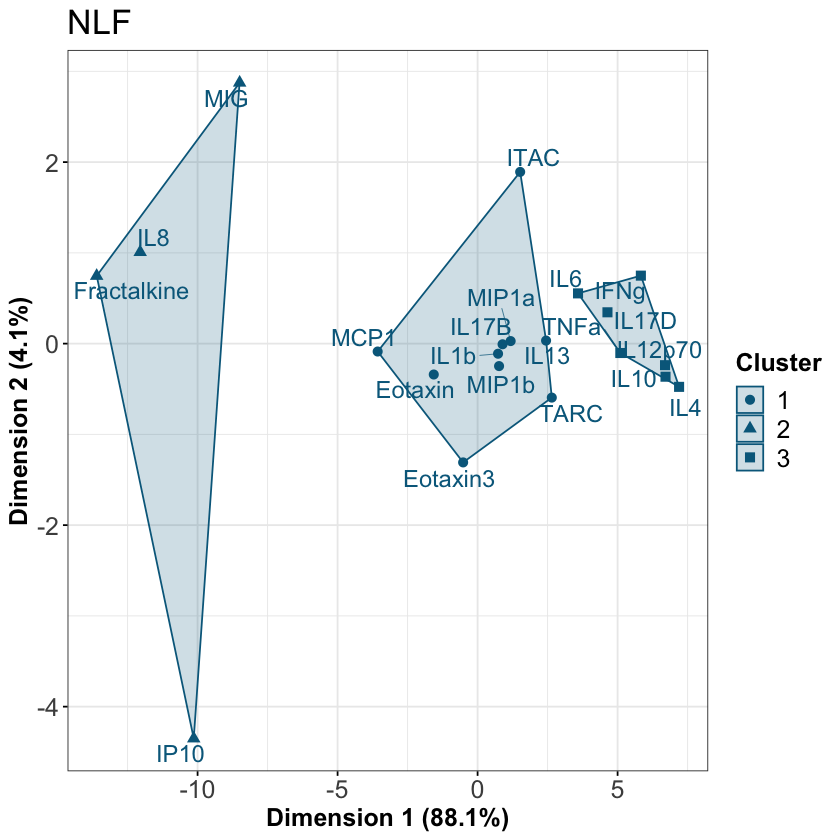

In [6]:
fviz_cluster(tNLF_Cluster_k3, data = tNLF, show.clust.cent = FALSE, labelsize=15, 
                      pointsize=2.5, repel=TRUE, main="NLF", show.legend=F, ggtheme=theme_bw(), 
                      legend.title="Cluster") +

  scale_colour_manual(values = c("deepskyblue4", "deepskyblue4", "deepskyblue4")) +
  scale_fill_manual(values = c("deepskyblue4", "deepskyblue4", "deepskyblue4"))+

  theme(legend.text = element_text(size = 15),axis.text = element_text(size = 15), 
        axis.title.x = element_text(size=15, face="bold"), axis.title.y = element_text(size=15, face="bold"),
        title=element_text(size=17), legend.title = element_text(size=15, face="bold")) + 
        xlab("Dimension 1 (88.1%)") + 
        ylab("Dimension 2 (4.1%)")

Using fviz_cluster is a bit clunky, so the results from kmeans needs to parsed in a way that ggplot will understand.

In [25]:
#NLF
trythis<-stats::prcomp(tNLF, scale = TRUE, center = TRUE)
NLF_scores<-as.data.frame(scores(trythis))
NLF_scores$Cluster <- tNLF_Cluster_k3$cluster
NLF_scores$Protein <- rownames(NLF_scores)

#ELF
trythis<-stats::prcomp(tELF, scale = TRUE, center = TRUE)
ELF_scores<-as.data.frame(scores(trythis))
ELF_scores$Cluster <- tELF_Cluster_k3$cluster
ELF_scores$Protein <- rownames(ELF_scores)

#Sputum
trythis<-stats::prcomp(tSputum, scale = TRUE, center = TRUE)
Sputum_scores<-as.data.frame(scores(trythis))
Sputum_scores$Cluster <- tSputum_Cluster_k3$cluster
Sputum_scores$Protein <- rownames(Sputum_scores)

#Serum
trythis<-stats::prcomp(tSerum, scale = TRUE, center = TRUE)
Serum_scores<-as.data.frame(scores(trythis))
Serum_scores$Cluster <- tSerum_Cluster_k3$cluster
Serum_scores$Protein <- rownames(Serum_scores)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,Cluster,Protein
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
Eotaxin,-1.5652194,-0.3403747,0.90213353,0.3027723,-1.2279653,-0.1450481,-0.25630793,0.89365605,0.62995660,-0.14109448,⋯,0.27718728,-0.228779737,0.044516225,0.126986925,-0.001246722,0.027442863,-0.001773091,2.775558e-16,1,Eotaxin
Eotaxin3,-0.5165407,-1.3089079,0.61779572,2.4692025,0.7949843,-0.9043176,-0.19906877,-0.14740425,-0.22989412,-0.09007233,⋯,-0.09300646,0.004638972,-0.029540903,-0.102866845,-0.009240173,0.005577896,0.002087385,0.000000e+00,1,Eotaxin3
Fractalkine,-13.6042030,0.7458454,1.25278655,-0.2261502,0.3367573,0.6042954,0.18953538,-0.40961658,0.41699367,-0.27651249,⋯,-0.01164476,-0.067451496,0.109249825,-0.267434073,-0.046016126,0.021422992,0.013984441,0.000000e+00,2,Fractalkine
IFNg,5.8308592,0.7490489,-0.07026324,-0.2139546,-0.6032727,0.1843313,-0.05070627,-0.41790523,-0.12822842,0.45789772,⋯,-0.25343277,0.090817183,0.008613826,0.028346659,0.026187297,-0.009306172,-0.001886920,1.110223e-16,3,IFNg
IL10,6.7111074,-0.3644510,-0.11021277,-0.1840525,0.5288643,0.2112132,0.13484152,-0.01638455,-0.13308906,0.08177348,⋯,0.06429358,-0.241225131,0.018050090,0.037894948,-0.119284558,-0.165591695,0.098111106,4.440892e-16,3,IL10
IL12p70,6.6939498,-0.2376726,0.06629159,-0.1677907,0.4359223,0.3614235,0.13398246,-0.26370702,-0.06466788,0.13820086,⋯,0.07598930,-0.132737285,0.001438060,-0.002841974,0.097353074,0.201189988,0.087768704,3.330669e-16,3,IL12p70


In [35]:
#NLF
grp.1.NLF <- NLF_scores[NLF_scores$Cluster == 1, ][chull(NLF_scores %>% filter(Cluster ==1) %>% select(PC1, PC2) ), ]  # hull values for cluster 1
grp.2.NLF <- NLF_scores[NLF_scores$Cluster == 2, ][chull(NLF_scores %>% filter(Cluster ==2) %>% select(PC1, PC2) ), ]  # hull values for cluster 2
grp.3.NLF <- NLF_scores[NLF_scores$Cluster == 3, ][chull(NLF_scores %>% filter(Cluster ==3) %>% select(PC1, PC2) ), ]  # hull values for cluster 3
all_hulls_NLF <- rbind(grp.1.NLF,grp.2.NLF,grp.3.NLF)
head(all_hulls_NLF)

#ELF
grp.1.ELF <- ELF_scores[ELF_scores$Cluster == 1, ][chull(ELF_scores %>% filter(Cluster ==1) %>% select(PC1, PC2) ), ]  # hull values for cluster 1
grp.2.ELF <- ELF_scores[ELF_scores$Cluster == 2, ][chull(ELF_scores %>% filter(Cluster ==2) %>% select(PC1, PC2) ), ]  # hull values for cluster 2
grp.3.ELF <- ELF_scores[ELF_scores$Cluster == 3, ][chull(ELF_scores %>% filter(Cluster ==3) %>% select(PC1, PC2) ), ]  # hull values for cluster 3
all_hulls_ELF <- rbind(grp.1.ELF,grp.2.ELF,grp.3.ELF)

#Sputum
grp.1.Sputum <- Sputum_scores[Sputum_scores$Cluster == 1, ][chull(Sputum_scores %>% filter(Cluster ==1) %>% select(PC1, PC2) ), ]  # hull values for cluster 1
grp.2.Sputum <- Sputum_scores[Sputum_scores$Cluster == 2, ][chull(Sputum_scores %>% filter(Cluster ==2) %>% select(PC1, PC2) ), ]  # hull values for cluster 2
grp.3.Sputum <- Sputum_scores[Sputum_scores$Cluster == 3, ][chull(Sputum_scores %>% filter(Cluster ==3) %>% select(PC1, PC2) ), ]  # hull values for cluster 3
all_hulls_Sputum <- rbind(grp.1.Sputum,grp.2.Sputum,grp.3.Sputum)

#Serum
grp.1.Serum <- Serum_scores[Serum_scores$Cluster == 1, ][chull(Serum_scores %>% filter(Cluster ==1) %>% select(PC1, PC2) ), ]  # hull values for cluster 1
grp.2.Serum <- Serum_scores[Serum_scores$Cluster == 2, ][chull(Serum_scores %>% filter(Cluster ==2) %>% select(PC1, PC2) ), ]  # hull values for cluster 2
grp.3.Serum <- Serum_scores[Serum_scores$Cluster == 3, ][chull(Serum_scores %>% filter(Cluster ==3) %>% select(PC1, PC2) ), ]  # hull values for cluster 3
all_hulls_Serum <- rbind(grp.1.Serum,grp.2.Serum,grp.3.Serum)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,Cluster,Protein
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
TARC,2.6499184,-0.59478863,0.9845040,0.6208971,-0.5834348,0.07972781,-0.05682941,0.18115906,0.03009741,-0.03880177,⋯,0.15756953,0.244673642,0.030164234,0.008492043,-0.014410622,-0.013666440,0.0034142057,4.440892e-16,1,TARC
Eotaxin3,-0.5165407,-1.30890790,0.6177957,2.4692025,0.7949843,-0.90431762,-0.19906877,-0.14740425,-0.22989412,-0.09007233,⋯,-0.09300646,0.004638972,-0.029540903,-0.102866845,-0.009240173,0.005577896,0.0020873846,0.000000e+00,1,Eotaxin3
MCP1,-3.5688045,-0.08703030,0.4833573,0.3576121,0.4466584,0.64081701,-0.37466622,-0.29100063,0.30870240,-0.12135137,⋯,-0.25135382,-0.109413825,-0.314824257,0.253385379,0.087012984,-0.036156803,-0.0245197782,3.330669e-16,1,MCP1
ITAC,1.5201345,1.89204800,-1.4888931,0.6649234,-1.3803521,-0.02290048,-0.20446444,-0.19860579,-0.68128404,-0.54383534,⋯,-0.03525565,-0.069819044,0.080346115,0.008550306,0.002557650,0.015575178,0.0081505647,4.440892e-16,1,ITAC
IL13,2.4457138,0.03339906,-0.5269842,-0.5253485,0.5379569,-0.40799613,-0.35760341,0.07237236,-0.04571144,0.06741885,⋯,0.54558242,0.117088620,-0.117846594,-0.139106677,0.144491518,-0.067401173,-0.0042686281,3.330669e-16,1,IL13
IP10,-10.1371622,-4.35107080,-2.1252719,-0.4142522,-0.5449705,0.33223464,0.02206821,-0.08764623,-0.18556225,0.08362810,⋯,-0.02840033,0.015264779,0.005152201,-0.011759806,-0.002331396,0.002353656,0.0005642465,-1.110223e-16,2,IP10


In [41]:
#need to add a column to each scores_df to specify which compartment they correspond to facet_wrap 
add_compartment = function(dataframe, compartment_name){
    #"""
    #Takes the dataframes already made from above and adds a column specifying the compartment.

    #:param: compartment dataframe and compartment name
    #:output: a 22x3 matrix containing median, sd, and compartment for each cytokine. 
    #"""
    compartment = rep(compartment_name, times = length(dataframe$PC1))
    combined_df = cbind(dataframe,compartment)
    return(combined_df)
}

#adding compartment to scores df first
NLF_scores_df = add_compartment(NLF_scores,'NLF')
ELF_scores_df = add_compartment(ELF_scores, 'ELF')
Sputum_scores_df = add_compartment(Sputum_scores, 'Sputum')
Serum_scores_df = add_compartment(Serum_scores, 'Serum')

#adding compartment to all_hulls df
all_hulls_NLF_df = add_compartment(all_hulls_NLF,'NLF')
all_hulls_ELF_df = add_compartment(all_hulls_ELF, 'ELF')
all_hulls_Sputum_df = add_compartment(all_hulls_Sputum, 'Sputum')
all_hulls_Serum_df = add_compartment(all_hulls_Serum, 'Serum')

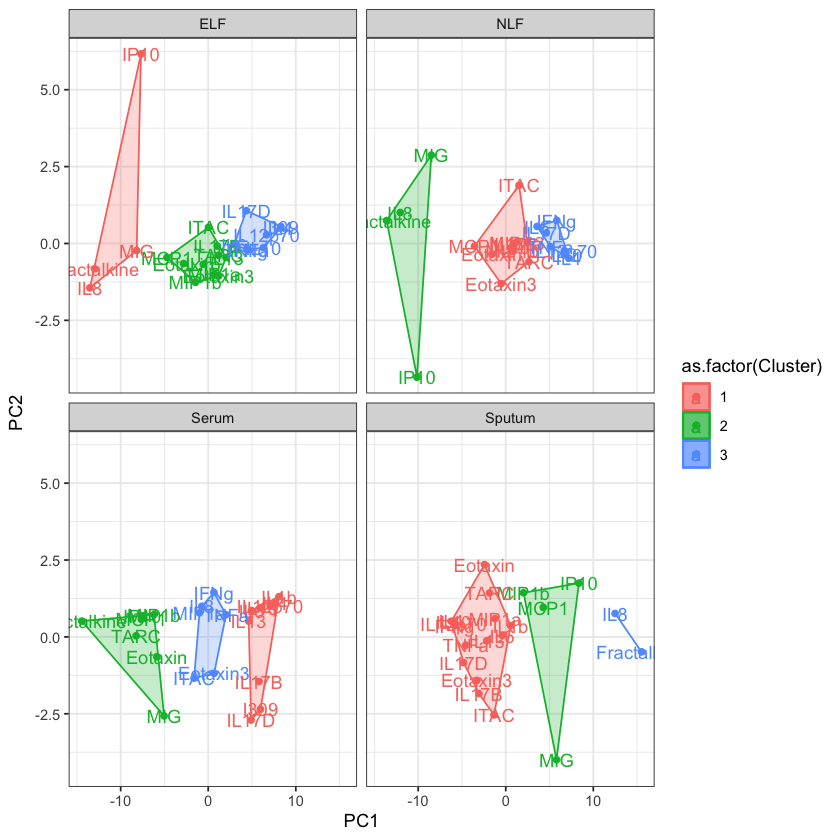

In [45]:
ggplot() + 
  #NLF
  geom_point(data = NLF_scores_df, aes(x = PC1, y = PC2, color = as.factor(Cluster))) +
  geom_text(data = NLF_scores_df, aes(x = PC1, y = PC2, color = as.factor(Cluster), label = Protein))  +
  geom_polygon(data = all_hulls_NLF_df, aes(x = PC1, y = PC2, fill = as.factor(Cluster), colour = as.factor(Cluster)), 
               alpha = 0.25) + 
  #ELF
  geom_point(data = ELF_scores_df, aes(x = PC1, y = PC2, color = as.factor(Cluster))) +
  geom_text(data = ELF_scores_df, aes(x = PC1, y = PC2, color = as.factor(Cluster), label = Protein))  +
  geom_polygon(data = all_hulls_ELF_df, aes(x = PC1, y = PC2, fill = as.factor(Cluster), colour = as.factor(Cluster)), 
               alpha = 0.25) + 
  #Sputum
  geom_point(data = Sputum_scores_df, aes(x = PC1, y = PC2, color = as.factor(Cluster))) +
  geom_text(data = Sputum_scores_df, aes(x = PC1, y = PC2, color = as.factor(Cluster), label = Protein))  +
  geom_polygon(data = all_hulls_Sputum_df, aes(x = PC1, y = PC2, fill = as.factor(Cluster), colour = as.factor(Cluster)), 
               alpha = 0.25) + 

  #Serum
  geom_point(data = Serum_scores_df, aes(x = PC1, y = PC2, color = as.factor(Cluster))) +
  geom_text(data = Serum_scores_df, aes( x = PC1, y = PC2, color = as.factor(Cluster), label = Protein))  +
  geom_polygon(data = all_hulls_Serum_df, aes(x = PC1, y = PC2, fill = as.factor(Cluster), colour = as.factor(Cluster)), 
               alpha = 0.25) + 
  
  facet_wrap(~compartment) + 

  theme_bw() 